# <font color = orange>US bike-sharing provider BoomBikes</font>

## <font color = blue>Index:</font>

- [Problem Statement](#0)
- [Step 1: Data Sourcing](#1)
- [Step 2: Data Cleaning](#2)
    >[Manual inspection and columns cleaning](#2.1)<br/>
    >[Rows Cleaning](#2.2)<br/>
    >[Treating missing values](#2.3)<br/>
- [Step 3: Data Preparation](#3)
- [Step 4: EDA](#4)
    >[EDA Inferences](#4.1)
- [Step-5: Create dummy columns](#5)
    >[Categorical variables Bivariate analysis](#5.1)<br/>
    >[Inferences from categorical variables bivariate analysis](#5.2)<br/>
    >[Quantitative variables Bivariate analysis](#5.3)<br/>
    >[Inferences from quantitative variables bivariate analysis](#5.4)<br/>
- [Step6: Splitting Data into Training and Testing Sets](#6) 
- [Step-7: Model Building](#7)
    > [Build initial model using RFE](#7.1)<br/>
    > [Build model using stats model for detailed statistics](#7.2)<br/>
- [Step-8: Residual Analysis of the train data](#8)
- [Step-9: Predictions on test data](#9)
- [Conclusion](#10)

<a id="0"></a>
## <font color = blue>Problem Statement</font>
BoomBikes wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands 

<a id="1"></a>
## <font color = blue>Step 1: Data Sourcing</font>
###### Data is provided in a single csv file day.csv. in this section we will be loading using pandas and do some manual inspection

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the loan.csv file on which analysis needs to be done

df_bikesharing = pd.read_csv("day.csv")

df_bikesharing.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<a id="1.1"></a>
###### Dataset information analyis
- Analysing dataset size and data types 
- Inthis dataset cnt is the traget variable which represents the count of total rental bikes including both casual and registered 

In [3]:
# analysing the sahpe of data and checking for unique column
print(df_bikesharing.shape)

(730, 16)


In [4]:
df_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df_bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<a id="2"></a>
## <font color = blue>Step2-Data Cleaning</font>

<a id="2.1"></a>
###### Manual inspection and columns cleaning -
- No rows with invalid data hence we donot need to clean the rows. 
- Following columns will be deleted
    - instant : This is just a serial number, hence not need for analysis
    - dteday : We already have columns for year, month, weekday and working day which are usefull for the analysis, hence we donot need this column
    - casual, registered : We have cnt variable which is the total of both casual, registered and the problem statement is for the total demand, hence we donot need original data.

In [6]:
invalidColumns = ['instant','dteday','casual','registered',]

df_bikesharing = df_bikesharing.drop(invalidColumns, axis=1)

In [7]:
df_bikesharing.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


<a id="2.2"></a>
###### Rows Cleaning -
- There are no invalid rows hence row cleaning is not required

<a id="2.3"></a>
###### Treating missing values -
- Checking the percentage of missing values for each column
- no missing values are observed in the data set, hence missing values treatment is not needed.

In [8]:
# Calculating the Missing Values % contribution in DF
df_null = df_bikesharing.isnull().mean().round(4) * 100
df_null.sort_values(ascending=False)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

<a id="3"></a>
## <font color = blue>Step3-Data Preparation</font>
- Map all non binary categorical columns to meaningfull values
- Identified Non binary columns
    - season
    - month
    - weekday
    - weathersit
    

In [9]:
df_bikesharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [10]:
#Replacing month with actual Values
# Defining the map function
def month_map(x):
    return x.map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})
# Applying the function to the list
df_bikesharing[["mnth"]] = df_bikesharing[["mnth"]].apply(month_map)
df_bikesharing["mnth"].head()

0    jan
1    jan
2    jan
3    jan
4    jan
Name: mnth, dtype: object

In [11]:
#Replacing season with actual Values
# Defining the map function
def season_map(x):
    return x.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
# Applying the function to the list
df_bikesharing[["season"]] = df_bikesharing[["season"]].apply(season_map)
df_bikesharing["season"].head()


0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [12]:
#Replacing weekday with actual Values
# Defining the map function
def weekday_map(x):
    return x.map({0:"sun", 1:"mon", 2:"tue", 3:"wed", 4:"thu", 5:"fri",6:"sat"})
# Applying the function to the list
df_bikesharing[["weekday"]] = df_bikesharing[["weekday"]].apply(weekday_map)
df_bikesharing["weekday"].head()

0    sat
1    sun
2    mon
3    tue
4    wed
Name: weekday, dtype: object

In [13]:
#Replacing weathersit with actual Values
# Defining the map function
def weather_map(x):
    return x.map({1:"clear", 2:"cloudy", 3:"rain", 4:"heavyrain"})
# Applying the function to the list
df_bikesharing[["weathersit"]] = df_bikesharing[["weathersit"]].apply(weather_map)
df_bikesharing["weathersit"].head()

0    cloudy
1    cloudy
2     clear
3     clear
4     clear
Name: weathersit, dtype: object

In [14]:
#checking if mapping is done correctly
df_bikesharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [15]:
df_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<a id="4"></a>
## <font color = blue>Step-4 EDA</font>
- lets make pair plot for cnt column with all the numeric variables
- from below pair plots we can infer that temp, atemp have positive corellation with cnt


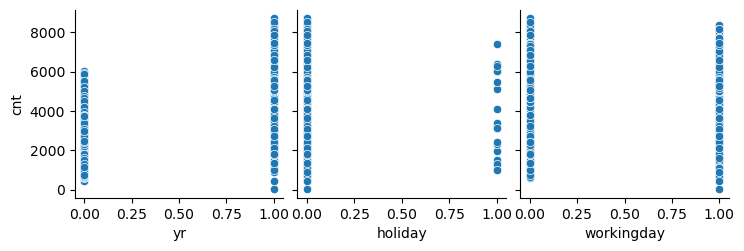

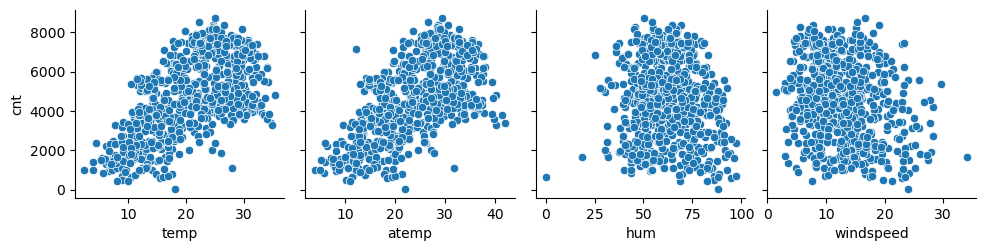

In [16]:
sns.pairplot(df_bikesharing,y_vars=['cnt'],x_vars=['yr','holiday','workingday'])
plt.show()
sns.pairplot(df_bikesharing,y_vars=['cnt'],x_vars=['temp','atemp','hum','windspeed'])
plt.show()

- lets make box plot for cnt column with all the categorical variables

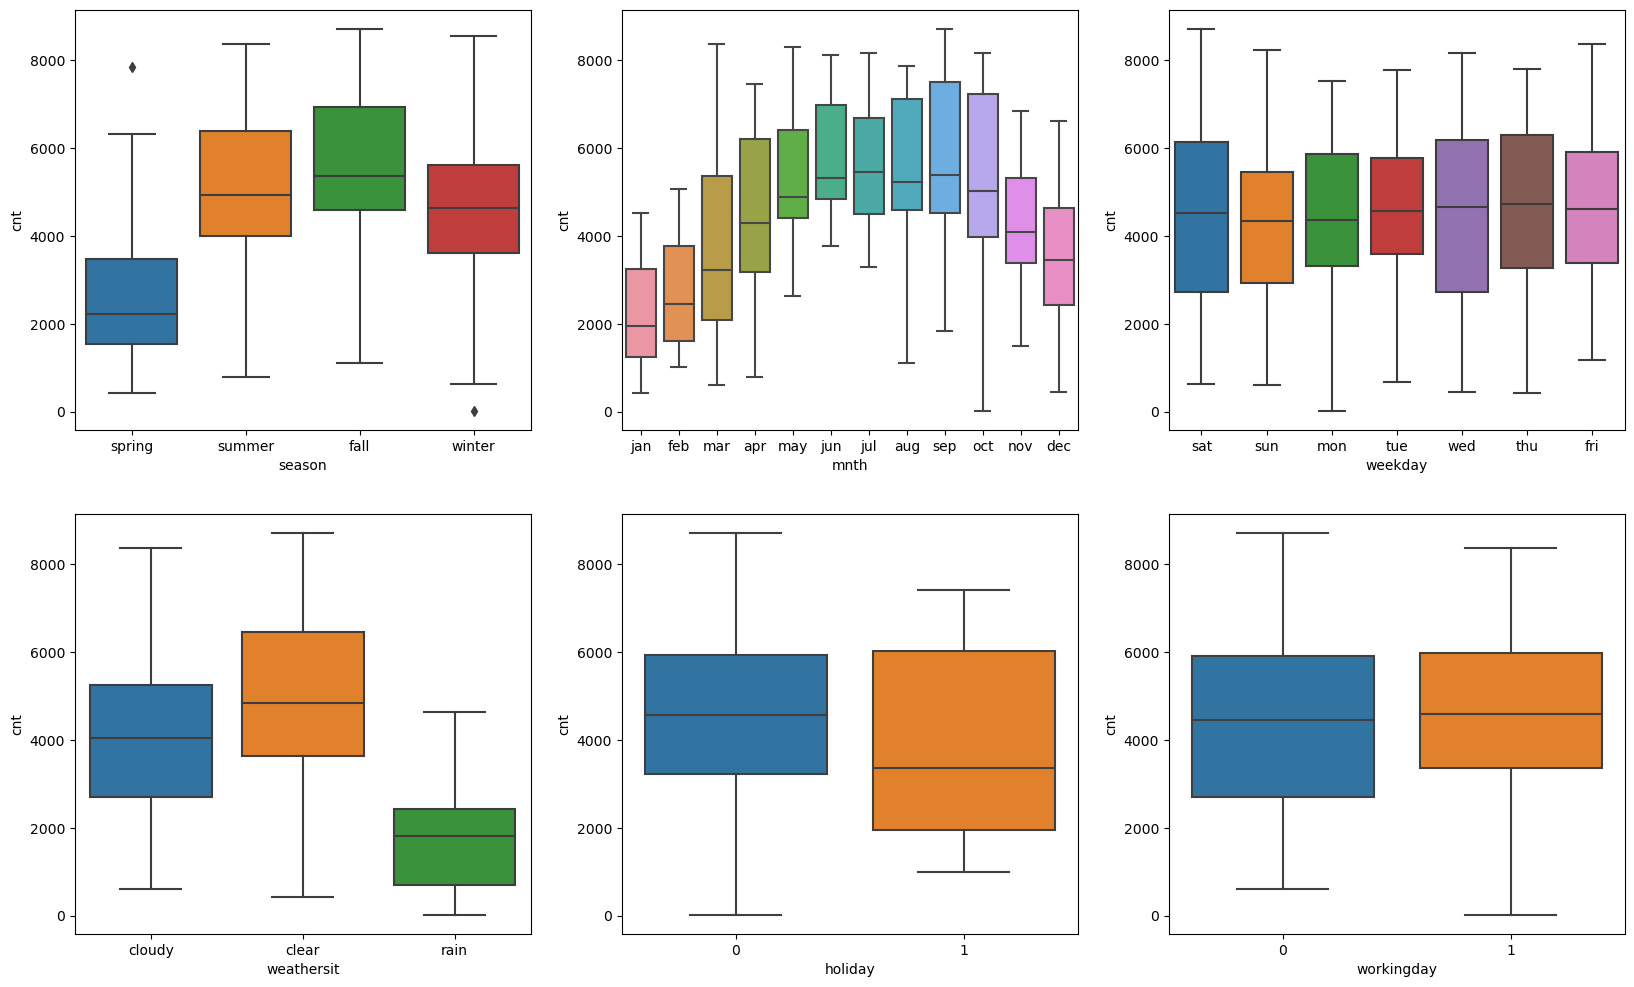

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bikesharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bikesharing)
plt.show()

<a id="4.1"></a>
###### EDA Inferences
below are the inferences from EDA
- Inferences from pair plot
    - temp, atemp has positive corellation with target variable cnt
- Inferences from box plot
    - there is more demand for bikes in summer and fall seasons
    - target variable cnt is very less in rainy weather
    - target variable cnt is less on holiday
    - weekday and working day doesnot impact the traget variable cnt
    - the target variable cnt increases gradually from jan till july and then it starts decreasing from july till dec

<a id="5"></a>
## <font color = blue>Step-5 Create dummy columns</font>
- Create dummy columns for non binary categorical columns.
- all below mentioned non binary categorical columns should be converted to 0 and 1 by creating dummy variables.
    - season has 4 different categories
    - mnth has 12 gategories
    - weekday has 7 categories
    - weathersit has 3 categories

In [18]:
df_bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season'
season = pd.get_dummies(df_bikesharing['season'], drop_first = True)
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'
month = pd.get_dummies(df_bikesharing['mnth'], drop_first = True)
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday'
weekday = pd.get_dummies(df_bikesharing['weekday'], drop_first = True)
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit'
weathersit = pd.get_dummies(df_bikesharing['weathersit'], drop_first = True)

#concat the above catergorical datasets to maon dataset df_bikesharing
df_bikesharing = pd.concat([df_bikesharing, season,weekday,weathersit,month], axis = 1)

#Let us see how the data set looks with dummy columns
pd.set_option('display.max_columns', None)
df_bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,cloudy,rain,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,spring,0,jan,0,sat,0,cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,sun,0,cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [20]:
#drop the actual columns that correspond to dummy columns
df_bikesharing.drop(["season","mnth","weekday","weathersit"],inplace=True,axis=1)


In [21]:
df_bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  mon         730 non-null    uint8  
 12  sat         730 non-null    uint8  
 13  sun         730 non-null    uint8  
 14  thu         730 non-null    uint8  
 15  tue         730 non-null    uint8  
 16  wed         730 non-null    uint8  
 17  cloudy      730 non-null    uint8  
 18  rain        730 non-null    uint8  
 19  aug         730 non-null    u

In [22]:
#Let us see how the values in the final data set is with all numeric values
df_bikesharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,cloudy,rain,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.336986,0.028767,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.473004,0.167266,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="6"></a>
## <font color = blue>Step-6 Splitting Data into Training and Testing Sets</font>
- Now we need to split the data into Train andTest data sets.
- Train data set will be used to construct the model
- Test data set will be used to validated the model.

In [23]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


<a id="5.1"></a>
###### Rescaling the features
- after analysing the min and max values of various features there is lot of variance. So it is extremely important to rescale the variables so that they have a comparable scale.
- There are two common ways of rescaling
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time we will use Min-Max scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,cloudy,rain,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,cloudy,rain,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


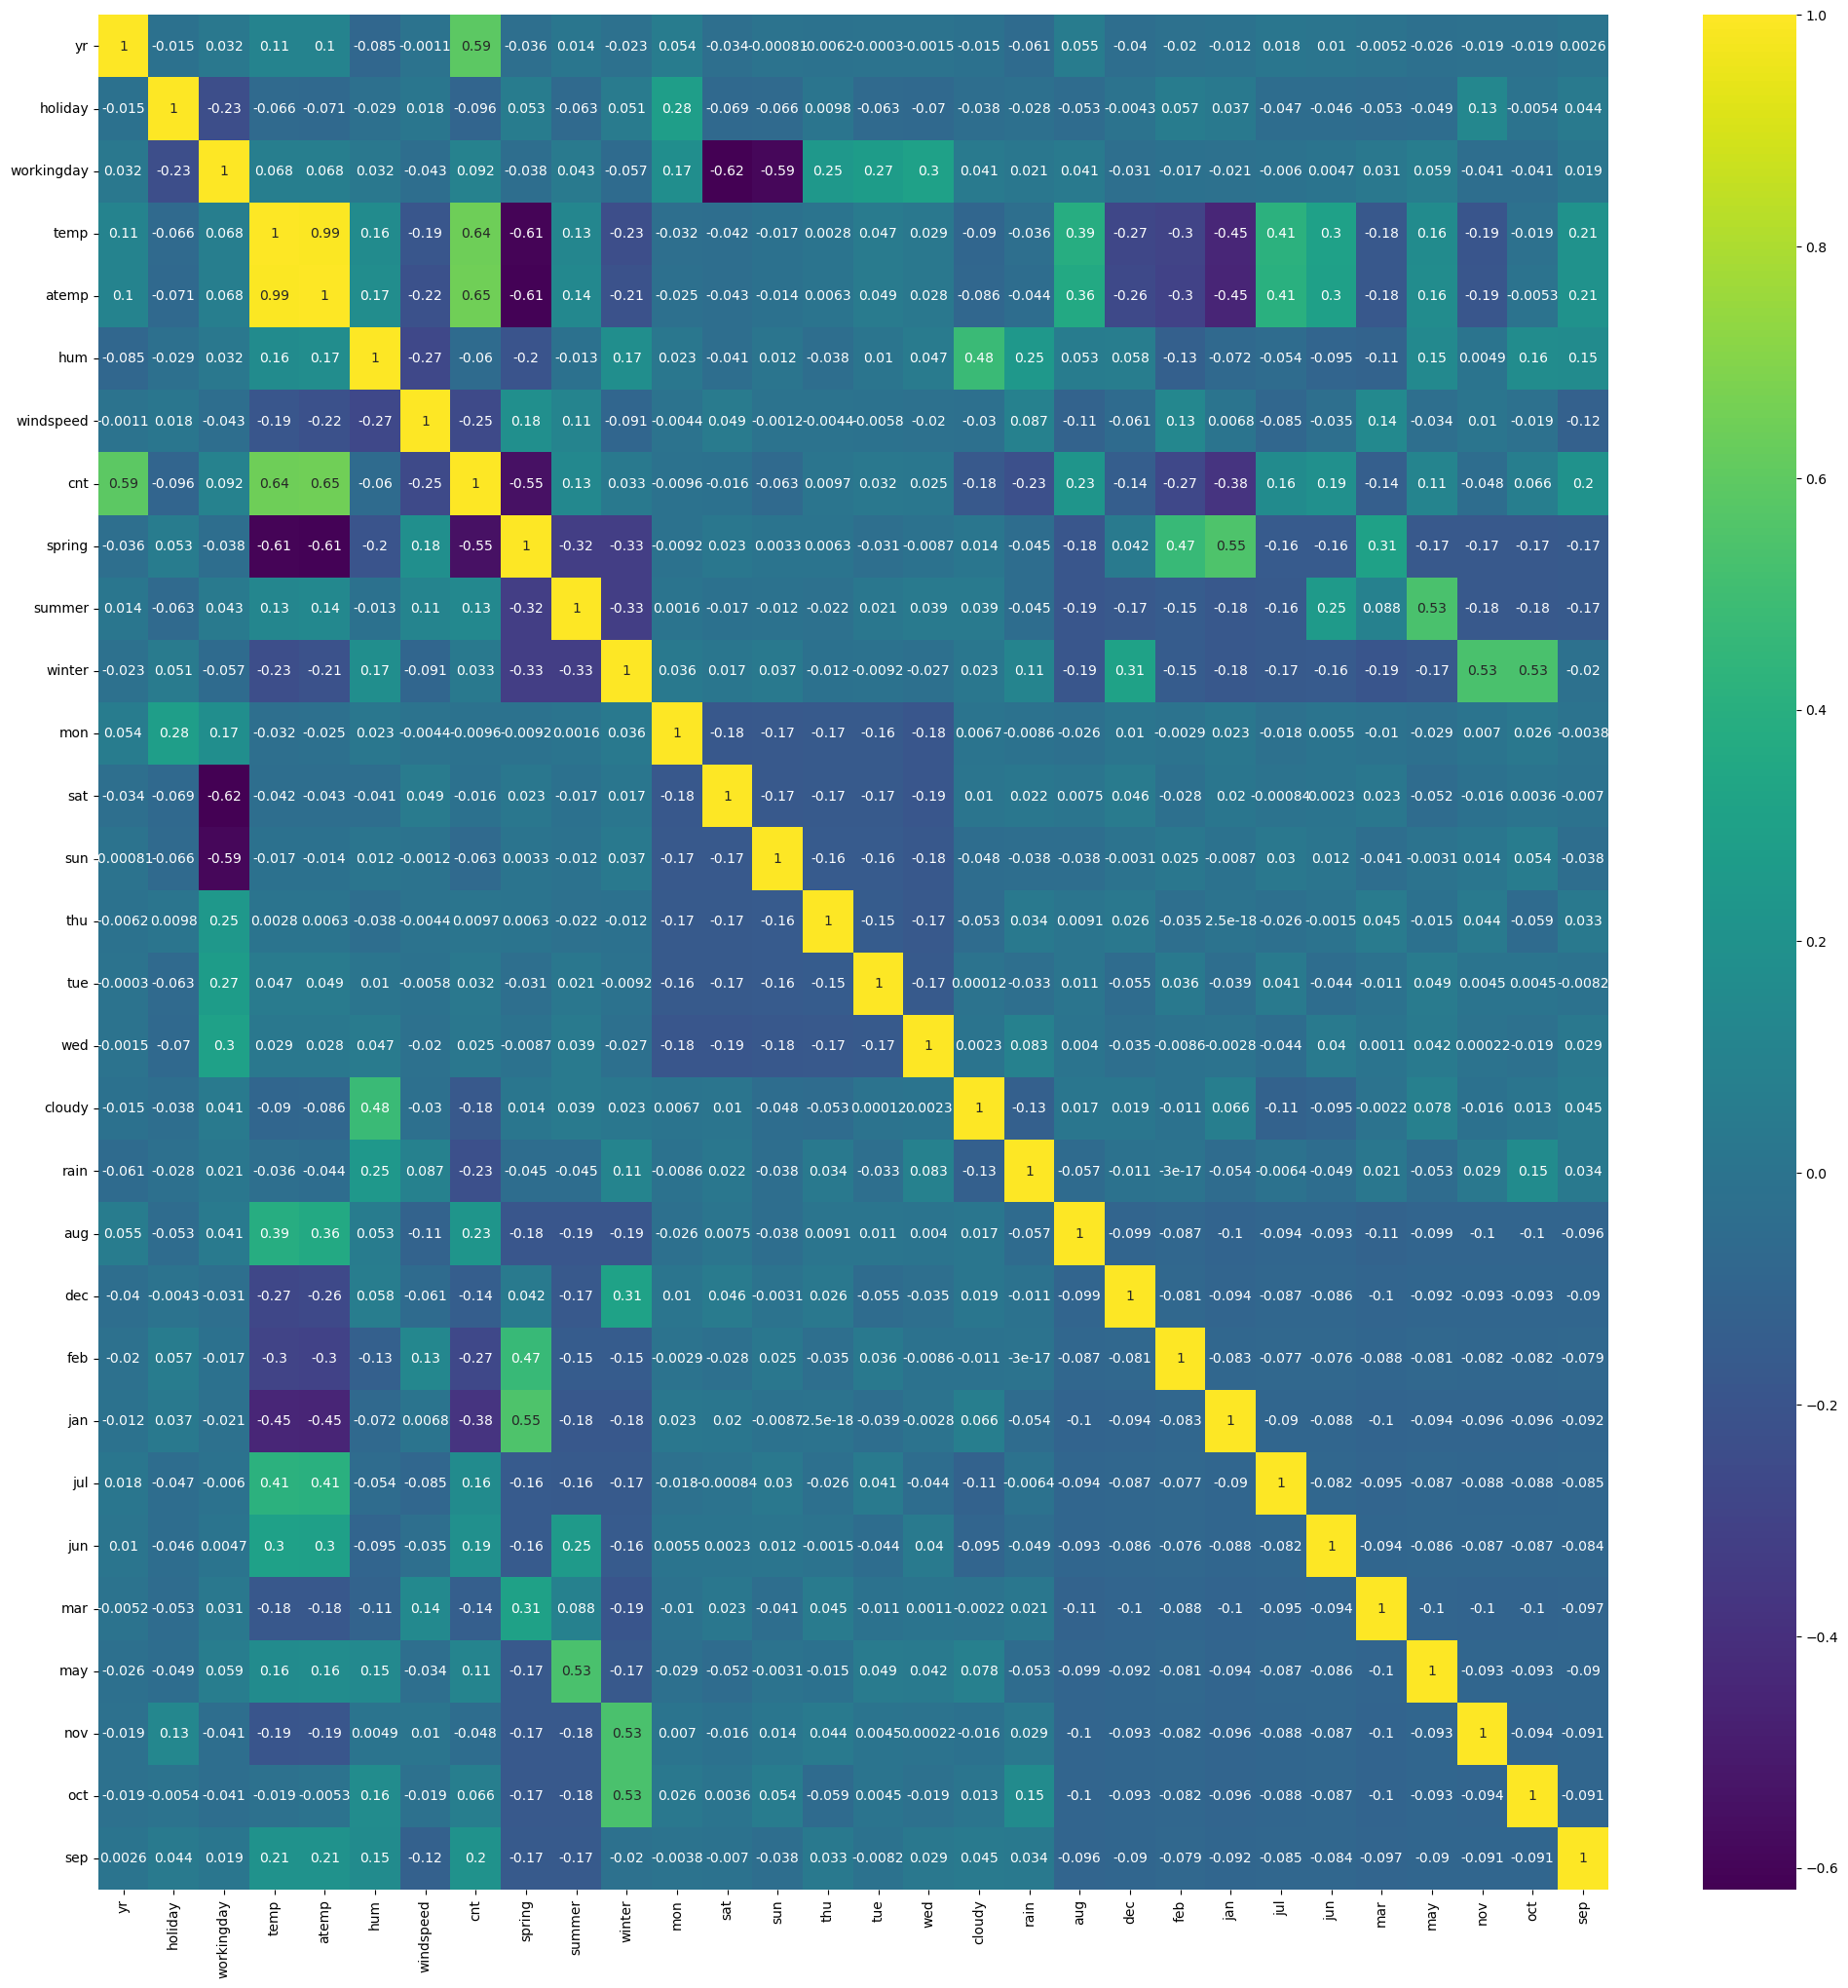

In [30]:
##### Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(),annot=True, cmap="viridis")
plt.show()

##### From the heat map we can find that temp and atemp are highly correlated to traget variable cnt. Lets do a pairplot to visualize the same

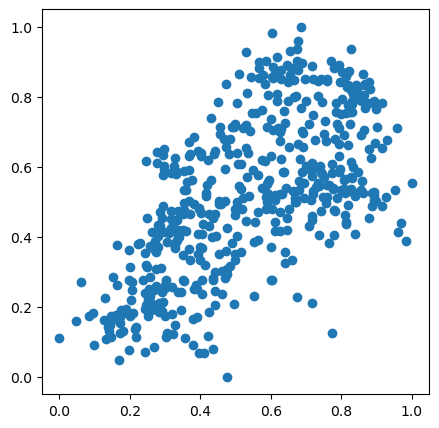

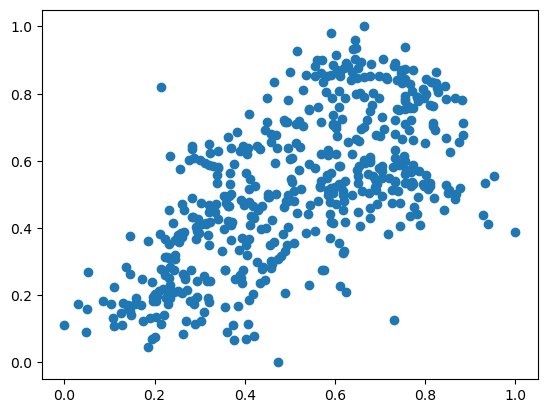

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(df_train.temp,df_train.cnt)
plt.show()
plt.scatter(df_train.atemp,df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('cnt')
x_train = df_train

<a id="7"></a>
## <font color = blue>Step-7 Model Building</font>
<a id="7.1"></a>
#### Build initial model using RFE 
    - we will be using the LinearRegression function from SciKit Learn as it is compatibility with RFE

In [33]:
#importing RFE and linear rigression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
#running RFE with 15 out put variables
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm,n_features_to_select=15)
#running RFE
rfe = rfe.fit(x_train,y_train)

In [35]:
list(zip(x_train,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('cloudy', True, 1),
 ('rain', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1)]

In [36]:
#variables included in the model
cols_included = x_train.columns[rfe.support_]
cols_included

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'sat', 'cloudy', 'rain', 'jan', 'jul', 'sep'],
      dtype='object')

In [37]:
#variables included in the model
cols_notincluded = x_train.columns[~rfe.support_]
cols_notincluded

Index(['atemp', 'mon', 'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb', 'jun',
       'mar', 'may', 'nov', 'oct'],
      dtype='object')

<a id="7.2"></a>
#### Build model using stats model for detailed statistics

In [38]:
# extracting x_train from the variables selected in rfe
x_train_sm1 =x_train[cols_included]

In [39]:
import statsmodels.api as sm
x_train_sm1 = sm.add_constant(x_train_sm1)

In [40]:
lm_sm1=sm.OLS(y_train,x_train_sm1).fit() #running the linear model

In [41]:
print(lm_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          2.31e-191
Time:                        05:23:14   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

###### All P values in the above summary are greater than 0.05 hence we will not be removing anf variables based on p values
###### Lets go ahead and calculate VIF values to see if there are highly dependent variables and hence could be removed

In [42]:
x_train_vif = x_train_sm1.drop(['const'],axis=1)


In [43]:
#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x=x_train_vif
vif['Features']=x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
10,cloudy,2.29
0,yr,2.09
9,sat,1.98


###### humidity is having highest vif and its more than 5 hence drop humidity

In [44]:
x_train_sm2 = x_train_sm1.drop(['hum'],axis=1)

In [45]:
sm.add_constant(x_train_sm2)
print(x_train_rfe.columns)

NameError: name 'x_train_rfe' is not defined

In [46]:
lm_sm2=sm.OLS(y_train,x_train_sm2).fit() #running the linear model

In [47]:
print(lm_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          7.33e-189
Time:                        05:23:24   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

In [48]:
x_train_vif = x_train_sm2.drop(['const'],axis=1)
vif = pd.DataFrame()
x=x_train_vif
vif['Features']=x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
8,sat,1.97
11,jan,1.62
12,jul,1.59


###### temp is having highest vif and its more than 5 hence drop temp

In [49]:
x_train_sm3 = x_train_sm2.drop(['temp'],axis=1)
sm.add_constant(x_train_sm3)
lm_sm3=sm.OLS(y_train,x_train_sm3).fit() #running the linear model
print(lm_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          4.04e-154
Time:                        05:23:26   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5448      0.020     27.136      0.0

###### After dropping temp the R-squared value is falling down drastically by 7% ,
## Hence i have decided lm_sm2 as the final model with R-squared as 0.843

<a id="8"></a>
## <font color = blue>Step-8 Residual Analysis of the train data</font>
- This is the first step to evaluate the model
- In this step we will check if the error terms are normally distributed
- From the below plot you can see that the error terms are nomally distrubuted and the mean is 0.
- Hence the model is good

In [50]:
y_train_predicted = lm_sm2.predict(x_train_sm2)

Text(0.5, 9.444444444444438, 'Error')

<Figure size 640x480 with 0 Axes>

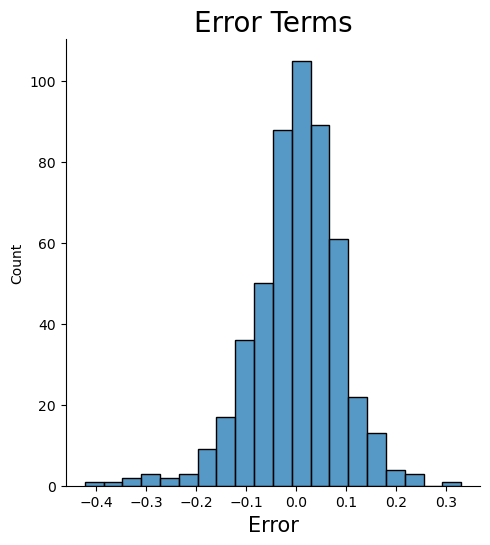

In [51]:
#plot the histogram of error terms
%matplotlib inline
plt.figure()
sns.displot((y_train - y_train_predicted),bins=20)
plt.title("Error Terms",fontsize=20)
plt.xlabel("Error",fontsize=15)

<a id="9"></a>
## <font color = blue>Step-9 Predictions on test data</font>
- Scale the test data using the same scale that was created with train set.
- we should not fit the scaler with test set, we should only transform the test set with scaler
- test test should be unseen data hence we should not fit scalaer with test set

In [52]:
# scling the test dataset
num_vars=['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [53]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed,cloudy,rain,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#dividing into x_test and y_test
y_test = df_test.pop('cnt')
x_test = df_test

In [55]:
#add contant to x_test
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,mon,sat,sun,thu,tue,wed,cloudy,rain,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [56]:
x_test_sm = x_test_sm[x_train_sm2.columns]
x_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring',
       'summer', 'winter', 'sat', 'cloudy', 'rain', 'jan', 'jul', 'sep'],
      dtype='object')

In [57]:
x_test_sm.head()

,const,yr,holiday,workingday,temp,windspeed,spring,summer,winter,sat,cloudy,rain,jan,jul,sep
184,1.0,0,1,0,0.831783,0.084219,0,0,0,0,1,0,0,1,0
535,1.0,1,0,1,0.901354,0.153728,0,1,0,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.334206,0,0,1,0,1,0,0,0,0
221,1.0,0,0,1,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.537414,0,1,0,0,0,0,0,0,0


In [58]:
# Making predictions
y_test_pred = lm_sm2.predict(x_test_sm)

In [59]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8045478865351154

Text(0, 0.5, 'y_pred')

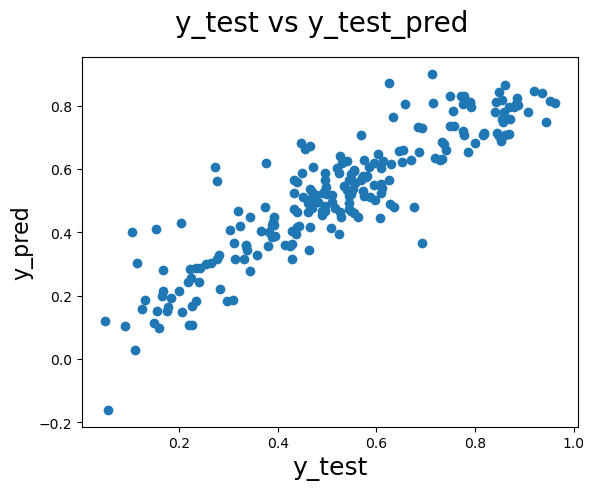

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [61]:
#best fit model summary
print(lm_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          7.33e-189
Time:                        05:23:50   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

<a id="10"></a>
## <font color = blue>Conclusion</font>
Below are the conclusions from the Multiple Linear Regression model building and evaluation:
- Derived the initial model with 15 variables using RFE. R-squared: 0.849
- Dropped humidity with high VIF(29.40), derived second model with 14 variables. <font color="blue" size="5"> R-squared: 0.843 - Best fit model</font>
- Dropped temp with VIF(7.07) , derived second model with 13 variables. R-squared: 0.781
- Drastic decrease in R-squared and Adjusted R-squared after dropping temp. Hence the second model with 14 variables is considered as best model for this dataset.
- Plotted the error terms histogram. Its close to normal distribution, Mean value of error terms is almost 0. Hence this model best fit.
- With best fit model calculated Test data R-squared: 0.805
- Difference between tarin r-squared and test R-suared is 4.4%. hence this is best fit model
- Final Model: <br>
<font color="blue" size="3">cnt = 0.1737 + 0.2344 X yr - 0.0562 X holiday + 0.0465 X workingday + 0.4728 X temp - 0.1563 X windspeed - 0.0597 X spring + 0.0434 X summer + 0.0797 X winter + 0.0584 X sat - 0.0826 X cloudy - 0.2917 X rain - 0.0389 X jan - 0.0482 X jul + 0.0753 X Sep </font>